In [202]:
# BEV's Vs PHEV's Vs ICE vehicles are the current options
# when purchasing an automobile. BEV being a fully electric
# battery powered car, PHEV or hybrid vehicle is a electric
# and gas powered car, ICE or internal combustion engine 
# vehicle. BEV is the most efficient as far as energy at
# almost 90% and ICE is lowest between 20-40%. Hybrids are 
# somewhere inbetween depending on how much the electric
# motor is used vs gas powered engine.

In [204]:
# Other benefits of BEV adn PHEV is that they have
# far less emissions and damage the environment less. 

In [206]:
# Electric Vehicle Population Size History By County CSV from DATA.GOV
# This shows the number of vehicles that were registered by Washington State 
# Department of Licensing (DOL) each month. The data is separated by county 
# for passenger vehicles and trucks.

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [210]:
url = "https://data.wa.gov/api/views/3d5d-sdqb/rows.csv?accessType=DOWNLOAD"
Electric = pd.read_csv(url)

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26486 entries, 0 to 26485
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      26486 non-null  object 
 1   County                                    26387 non-null  object 
 2   State                                     26387 non-null  object 
 3   Vehicle Primary Use                       26486 non-null  object 
 4   Battery Electric Vehicles (BEVs)          26486 non-null  int64  
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  26486 non-null  int64  
 6   Electric Vehicle (EV) Total               26486 non-null  int64  
 7   Non-Electric Vehicle Total                26486 non-null  int64  
 8   Total Vehicles                            26486 non-null  int64  
 9   Percent Electric Vehicles                 26486 non-null  float64
dtypes: float64(1), int64(5), object(4)

In [211]:
#Reorganized the data to date format and checked with head function
# Convert 'Date' column to datetime format
Electric['Date'] = pd.to_datetime(Electric['Date'])

# Create new columns for Month, Day, and Year
Electric['Month'] = Electric['Date'].dt.month_name()  # Full month name
Electric['Day'] = Electric['Date'].dt.day
Electric['Year'] = Electric['Date'].dt.year

Electric['Date'] = pd.to_datetime(Electric['Date'])
print(Electric[["Date", "Year", "Month"]].head())

        Date  Year     Month
0 2021-11-30  2021  November
1 2023-01-31  2023   January
2 2020-08-31  2020    August
3 2017-08-31  2017    August
4 2022-06-30  2022      June


In [212]:
Electric = Electric.rename(columns={
    "Battery Electric Vehicles (BEVs)": "BEVs",
    "Plug-In Hybrid Electric Vehicles (PHEVs)": "PHEVs",
    "Non-Electric Vehicle Total": "Non Evs Total",
    "Electric Vehicle (EV) Total": "Total Evs"})

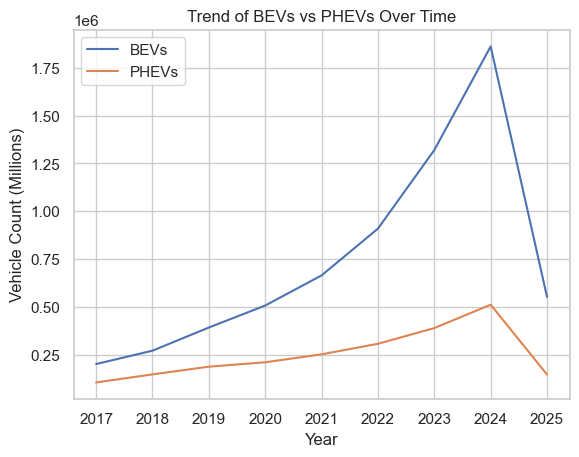

In [213]:
sns.set_theme(style="whitegrid")
yearly = Electric.groupby('Year')[['BEVs', 'PHEVs']].sum().reset_index()

sns.lineplot(data=yearly, x='Year', y='BEVs', label='BEVs')
sns.lineplot(data=yearly, x='Year', y='PHEVs', label='PHEVs')

plt.title("Trend of BEVs vs PHEVs Over Time")
plt.ylabel("Vehicle Count (Millions)")
plt.show()

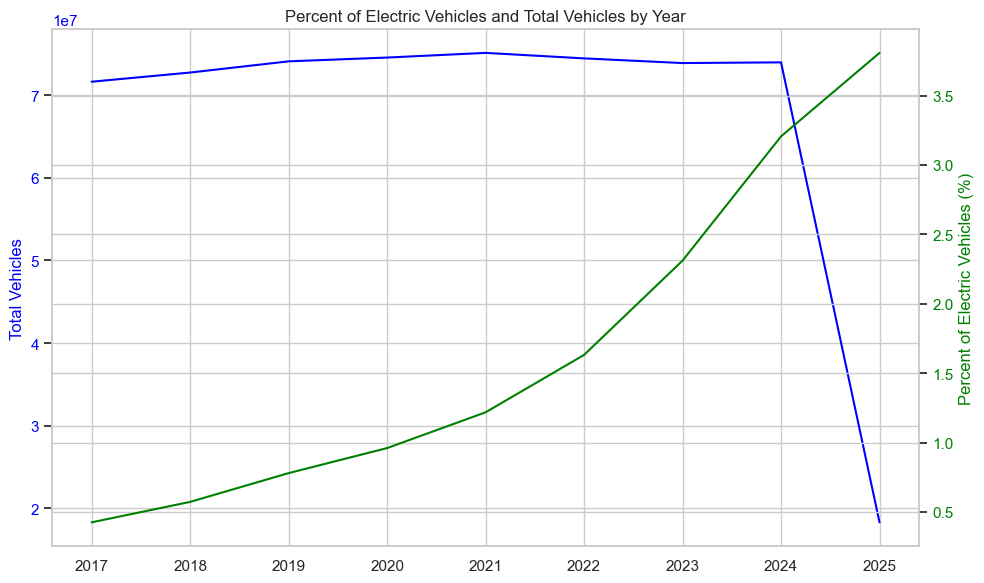

In [218]:
sns.set_theme(style="whitegrid")
yearly = Electric.groupby('Year')[['BEVs', 'PHEVs', 'Total Evs', 'Total Vehicles']].sum().reset_index()

# Calculate percent of electric vehicles
yearly['Percent EV'] = (yearly['Total Evs'] / yearly['Total Vehicles']) * 100

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot total vehicle count
ax1.plot(yearly['Year'], yearly['Total Vehicles'], color='blue', label='Total Vehicles')
ax1.set_ylabel('Total Vehicles', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for percent EV
ax2 = ax1.twinx()
ax2.plot(yearly['Year'], yearly['Percent EV'], color='green', label='Percent EV')
ax2.set_ylabel('Percent of Electric Vehicles (%)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Titles and labels
plt.title('Percent of Electric Vehicles and Total Vehicles by Year')
fig.tight_layout()
plt.show()

In [220]:
df = df.dropna(subset=['Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total', 'Total Vehicles'])

# Define Features (X) and Target (y)
X = df[['Non-Electric Vehicle Total', 'Total Vehicles']]
y = df['Electric Vehicle (EV) Total']

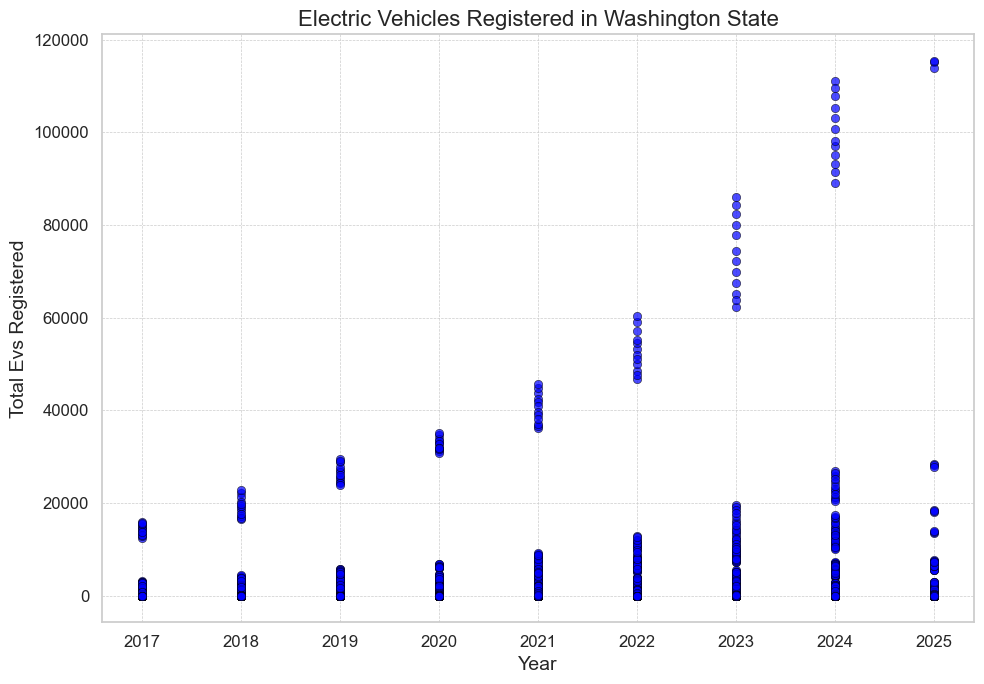

In [222]:

plt.figure(figsize=(10,7))
sns.scatterplot(x='Year', y='Total Evs', data=Electric, color='blue', edgecolor='black', alpha=0.7)
plt.title('Electric Vehicles Registered in Washington State', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Evs Registered', fontsize=14)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [230]:
Electric["EV_Dominant"] = (Electric["Total Evs"] > Electric["Non Evs Total"]).astype(int)

X = Electric[["Total Evs", "Non Evs Total"]]
y = Electric["EV_Dominant"]


In [232]:
from sklearn.model_selection import train_test_split

In [234]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30)

In [236]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()

In [238]:
X_train.shape, y_train.shape

((18540, 2), (18540,))

In [240]:
X_test.shape, y_test.shape

((7946, 2), (7946,))

In [242]:
LinReg.fit(X_train, y_train)

LinearRegression()

In [244]:
y_predicted = LinReg.predict(X_test)

In [246]:
mean_sq_error = np.mean( (y_test - y_predicted) **2 )
print(mean_sq_error)

0.008480199351126387


In [248]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_true = y_test, y_pred = LinReg.predict(X_test)))

0.008480199351126387


In [250]:
print(mean_squared_error(y_true = y_train, y_pred = LinReg.predict(X_train)))

0.007755882198304254


In [252]:
LinReg.score(X_test, y_test)

0.0005103667435311099

(array([7878.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          68.]),
 array([-0.02077043,  0.08047492,  0.18172028,  0.28296564,  0.384211  ,
         0.48545636,  0.58670171,  0.68794707,  0.78919243,  0.89043779,
         0.99168314]),
 <BarContainer object of 10 artists>)

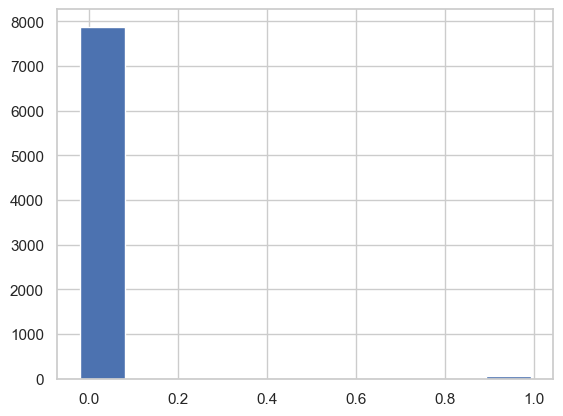

In [254]:
import matplotlib.pyplot as plt
plt.hist(y_test - y_predicted)

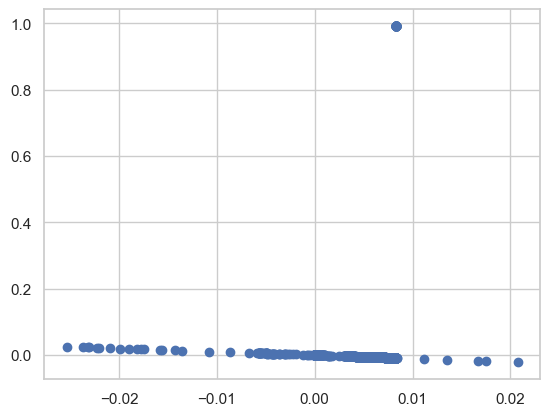

In [257]:
plt.scatter(y_predicted, y_test - y_predicted)

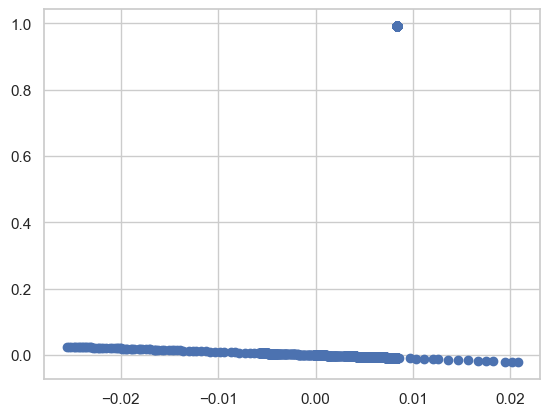

In [259]:
plt.scatter(LinReg.predict(X), y - LinReg.predict(X))

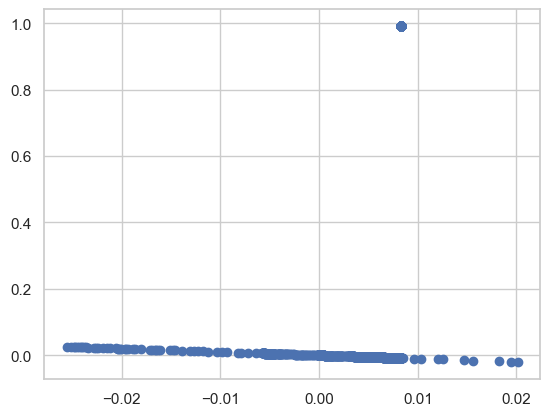

In [261]:
plt.scatter(LinReg.predict(X_train), y_train - LinReg.predict(X_train))

In [263]:
print(LinReg.coef_)

[ 4.17521950e-07 -2.81532715e-08]


In [265]:
print(LinReg.intercept_)

0.008316437950044045
